In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [2]:
data = "C:\\Users\phiri\\Desktop\\Projects_Freecodecamp\\Medical_Examinations\\medical_examination.csv"

In [3]:
df = pd.read_csv(data)

## Data Exploration

In [4]:
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Classify Body Size( Overweight/ not-Overweight)

In [7]:
# calculate BMI for every person
calc = df["weight"]/ ((df["height"]/100)**2)


In [8]:
df["Overweight"] = calc

#Normalise BMI values for each person
# 0 will represent good and 1 will represent something bad 
# BMI value greater than 25(Overweight) = 1, else = 0
df["Overweight"] = np.where(df["Overweight"] > 25, 1, 0)

In [9]:
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,1


## Further normalisation

In [11]:
df["cholesterol"] = np.where(df["cholesterol"] == 1,0,1)

In [14]:
df["gluc"] = np.where(df["gluc"] == 1,0,1)

In [15]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


## Comparitive catplot of good and bad outcomes for each feature

C:\Users\phiri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


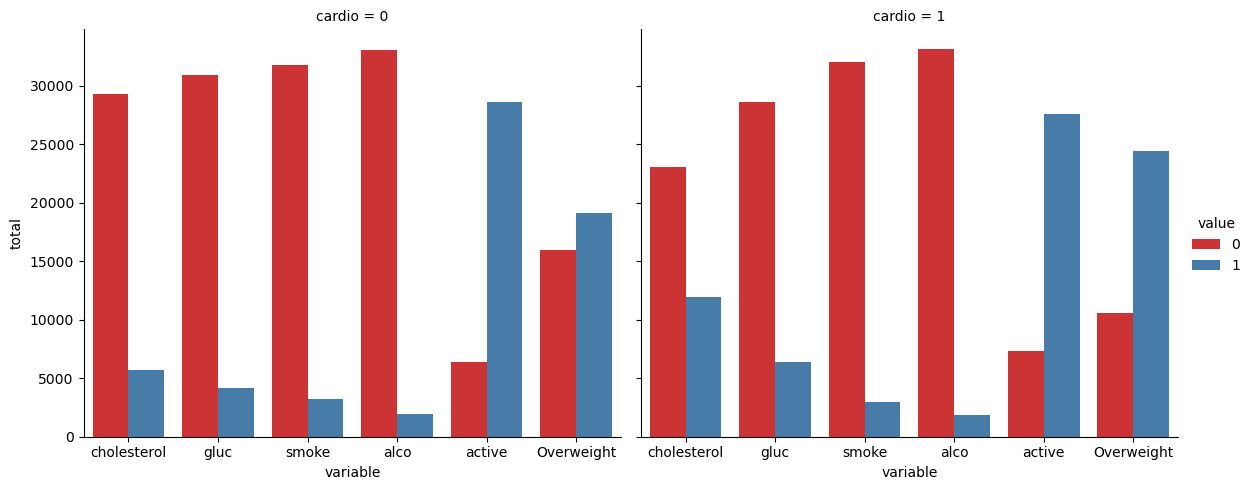

In [17]:
# Convert the DataFrame into long format
df_long = df.melt(id_vars=['id', 'cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'Overweight'],
                  var_name='variable', value_name='value')

# Create a catplot to show the value counts of categorical features split by cardio
g = sns.catplot(
    data=df_long,
    x='variable', 
    hue='value', 
    col='cardio', 
    kind='count', 
    height=5, 
    aspect=1.2, 
    palette='Set1'
)

g.set_axis_labels("variable", "total")
g.set_titles("cardio = {col_name}")
plt.show()

## CREATING CORRELATION MATRIX

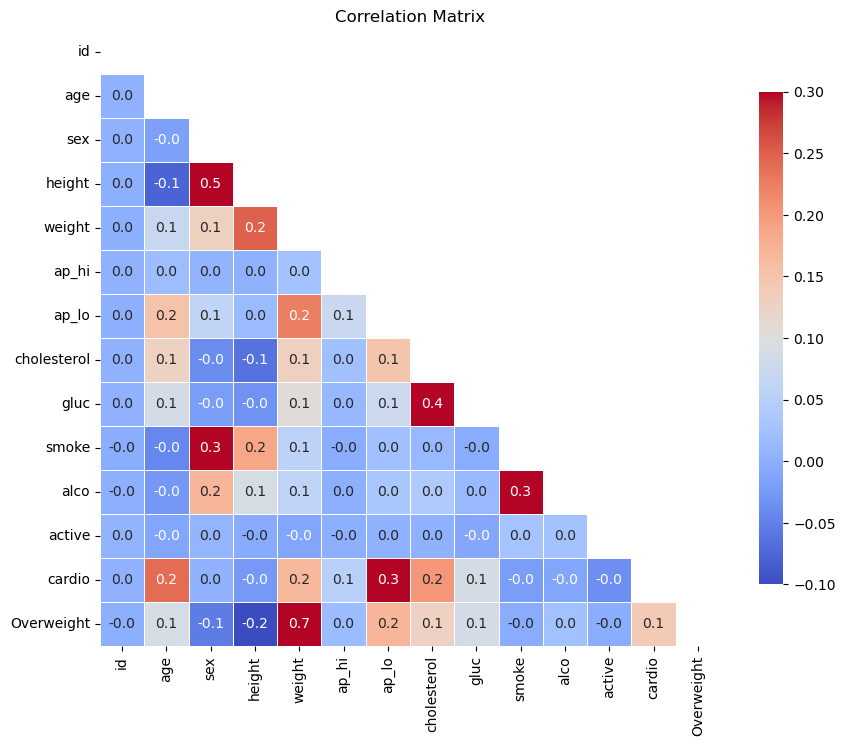

In [18]:
# Filter out incorrect data
df = df[(df['ap_lo'] <= df['ap_hi'])]

height_low = df['height'].quantile(0.025)
height_high = df['height'].quantile(0.975)
df = df[(df['height'] >= height_low) & (df['height'] <= height_high)]

weight_low = df['weight'].quantile(0.025)
weight_high = df['weight'].quantile(0.975)
df = df[(df['weight'] >= weight_low) & (df['weight'] <= weight_high)]

# Create the correlation matrix
corr = df.corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap="coolwarm", vmin=-0.1, vmax=0.3, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()